In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
focal_brands = ['Sephora',
 'ULTA Beauty',
 'Olive Garden',
 'The Cheesecake Factory',
 'Target',
 'Walmart',
 'Anthropologie',
 "Victoria's Secret"]

In [3]:
brand = focal_brands[0]
focal_brand_path = os.path.join('../part2_r_statistics', brand)
focal_brand_path

'../part2_r_statistics/Sephora'

In [4]:
file_list = os.listdir(focal_brand_path)
result_file_list = [file for file in file_list if file.find('_result') != -1]

In [5]:
result_df = pd.DataFrame()

for result_file in result_file_list:
    result_file_path = os.path.join(focal_brand_path, result_file)
    tmp_res_df = pd.read_csv(result_file_path, skiprows=1, float_precision="round_trip")
    # Removing all the records for ols and m_olsExp
    if 'filename' in tmp_res_df['filename'].tolist(): #Wrong input
        continue
    result_df = pd.concat([result_df, tmp_res_df], ignore_index=True)

In [6]:
result_df = result_df[~result_df['type'].isin(['ols', 'm_olsExp'])].reset_index(drop=True)
result_df = result_df.replace('FALSE', False).replace('False', False)
# result_df.iloc[:,3:] = result_df.iloc[:,3:].astype('float64', copy=True)

In [7]:
result_df

,tmp,filename,type,X_Estimate,X_Std. Error,X_t value,X_Pr(>|t|),IV_firststage_reviews_tw_Estimate,IV_firststage_reviews_tw_Std. Error,IV_firststage_reviews_tw_t value,...,HausWutest_Df,HausWutest_F,HausWutest_Pr(>F),Sargan_result_rsq,Sargan_result_adjrsq,Sargan_pvalue_rsq,Sargan_pvalue_adjrsq,num_sig_variables,Y_r.squared,Y_adj.r.squared
0,tmp,Brooks Brothers,fe_reviews_reviews,0.069505,0.019034,3.651686,2.663556e-04,-0.000100211019005055,0.000190635514929389,-0.52566815287368,...,-1,2.34354613255589,0.125940823615684,4.23449349278573,-353.500987164209,0.120362561387644,1,2,0.671032,0.625286
1,tmp,Brooks Brothers,fe_reviews_visits,0.068299,0.003906,17.487215,2.233359e-64,False,False,False,...,-1,1.9329373522152,0.164572372068733,1.21490380085773e-28,-355.731304347826,1,1,1,0.671424,0.625732
2,tmp,Brooks Brothers,fe_exp_reviews_reviews,1.541672,0.234746,6.567409,6.312742e-11,0.377923078481934,0.318135845031044,1.18792988713691,...,-1,14.7189627428136,0.000128155117934805,0.74492433429816,-357.468891520661,0.689035719250415,1,2,0.727018,0.689058
3,tmp,Brooks Brothers,fe_exp_reviews_visits,1.064166,0.030081,35.376507,3.701041e-219,False,False,False,...,-1,37.0578552273081,1.34043757762807e-09,2.74781634341386e-28,-355.731304347826,1,1,1,0.735753,0.699007
4,tmp,Torrid,fe_reviews_reviews,0.060262,0.021028,2.865750,4.187351e-03,0.00498750665721031,0.00258175309132841,1.93182945106654,...,-1,14.496389999924,0.000143060081773808,3.21982428292259,-346.092335329809,0.199905176680324,1,0,0.109297,0.019754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,tmp,REI,fe_exp_reviews_visits,17.982587,11.619486,1.547623,1.218157e-01,False,False,False,...,-1,159.888003382137,9.11891570094413e-36,3.13423717663725e-28,-347.234455958549,1,1,0,0.011222,-0.091762
1476,tmp,B,fe_reviews_reviews,1.637189,1.288917,1.270205,2.041267e-01,-0.000207663876637634,0.000482982056227962,-0.429961887734437,...,-1,4.07898337207887,0.0435235342635979,9.96297734472914,-343.774750838493,0.00686383694371739,1,1,0.044036,-0.075134
1477,tmp,B,fe_reviews_visits,4.949395,1.881332,2.630792,8.569535e-03,False,False,False,...,-1,1470.55007618526,9.57750888570686e-255,1.75098878080951e-28,-352.441507967353,1,1,1,0.036950,-0.083103
1478,tmp,B,fe_exp_reviews_reviews,-1.193309,3.944105,-0.302555,7.622535e-01,-0.00426440753458848,0.00068360771342525,-6.23809159967119,...,-1,0.309792452704997,0.577856108473467,2.8353034355311,-351.778482684411,0.242282296608164,1,3,0.007549,-0.116170


In [8]:
sum(result_df['filename'].value_counts() == 1)

0

In [9]:
sum(result_df['filename'].value_counts() == 2)

7

In [10]:
sum(result_df['filename'].value_counts() == 3)

6

In [11]:
sum(result_df['filename'].value_counts() == 4)

362

In [12]:
count_list = result_df['filename'].value_counts()
valid_brands = count_list[count_list == 4].index.to_list() # having the values of all the four models
len(valid_brands)

362

In [13]:
result_df = result_df[result_df['filename'].isin(valid_brands)]

### Making the Figure D1 and D2

1. We only need to select the brands whose p-value for all the models are significant (<0.05) i.e., X_Pr(>|t|)
2. Then we need to plot their X_Estimate for each of the four models
3. Then we need to put stars at the neighboring brands as per the p-value for each model \
-> *** means p_value <= 0.01 \
-> ** means 0.01 < p_value <= 0.05 \
-> * means 0.05 < p_value <= 0.1

In [14]:
coeff_est_df = result_df
coeff_est_df

,tmp,filename,type,X_Estimate,X_Std. Error,X_t value,X_Pr(>|t|),IV_firststage_reviews_tw_Estimate,IV_firststage_reviews_tw_Std. Error,IV_firststage_reviews_tw_t value,...,HausWutest_Df,HausWutest_F,HausWutest_Pr(>F),Sargan_result_rsq,Sargan_result_adjrsq,Sargan_pvalue_rsq,Sargan_pvalue_adjrsq,num_sig_variables,Y_r.squared,Y_adj.r.squared
0,tmp,Brooks Brothers,fe_reviews_reviews,0.069505,0.019034,3.651686,2.663556e-04,-0.000100211019005055,0.000190635514929389,-0.52566815287368,...,-1,2.34354613255589,0.125940823615684,4.23449349278573,-353.500987164209,0.120362561387644,1,2,0.671032,0.625286
1,tmp,Brooks Brothers,fe_reviews_visits,0.068299,0.003906,17.487215,2.233359e-64,False,False,False,...,-1,1.9329373522152,0.164572372068733,1.21490380085773e-28,-355.731304347826,1,1,1,0.671424,0.625732
2,tmp,Brooks Brothers,fe_exp_reviews_reviews,1.541672,0.234746,6.567409,6.312742e-11,0.377923078481934,0.318135845031044,1.18792988713691,...,-1,14.7189627428136,0.000128155117934805,0.74492433429816,-357.468891520661,0.689035719250415,1,2,0.727018,0.689058
3,tmp,Brooks Brothers,fe_exp_reviews_visits,1.064166,0.030081,35.376507,3.701041e-219,False,False,False,...,-1,37.0578552273081,1.34043757762807e-09,2.74781634341386e-28,-355.731304347826,1,1,1,0.735753,0.699007
4,tmp,Torrid,fe_reviews_reviews,0.060262,0.021028,2.865750,4.187351e-03,0.00498750665721031,0.00258175309132841,1.93182945106654,...,-1,14.496389999924,0.000143060081773808,3.21982428292259,-346.092335329809,0.199905176680324,1,0,0.109297,0.019754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,tmp,REI,fe_exp_reviews_visits,17.982587,11.619486,1.547623,1.218157e-01,False,False,False,...,-1,159.888003382137,9.11891570094413e-36,3.13423717663725e-28,-347.234455958549,1,1,0,0.011222,-0.091762
1476,tmp,B,fe_reviews_reviews,1.637189,1.288917,1.270205,2.041267e-01,-0.000207663876637634,0.000482982056227962,-0.429961887734437,...,-1,4.07898337207887,0.0435235342635979,9.96297734472914,-343.774750838493,0.00686383694371739,1,1,0.044036,-0.075134
1477,tmp,B,fe_reviews_visits,4.949395,1.881332,2.630792,8.569535e-03,False,False,False,...,-1,1470.55007618526,9.57750888570686e-255,1.75098878080951e-28,-352.441507967353,1,1,1,0.036950,-0.083103
1478,tmp,B,fe_exp_reviews_reviews,-1.193309,3.944105,-0.302555,7.622535e-01,-0.00426440753458848,0.00068360771342525,-6.23809159967119,...,-1,0.309792452704997,0.577856108473467,2.8353034355311,-351.778482684411,0.242282296608164,1,3,0.007549,-0.116170


In [15]:
def filter_brands_pvalue(brand_pvalue):
    pvalues = brand_pvalue.values
    
    if (pvalues[0] < 0.05) and (pvalues[1] < 0.05) and (pvalues[2] < 0.05) and (pvalues[3] < 0.05):
        return True
    else:
        return False

In [16]:
filtered_brands = coeff_est_df.groupby('filename')['X_Pr(>|t|)'].apply(filter_brands_pvalue)
filtered_brands_list = filtered_brands [filtered_brands == True].index.to_list()

In [17]:
def get_pvalue_stars(p_value):
    if p_value <= 0.01:
        return '***'
    elif 0.01 < p_value <= 0.05:
        return '**'
    elif 0.05 < p_value <= 0.1:
        return '*'
    else:
        return ''

In [18]:
coeff_est_df_filtered = coeff_est_df[coeff_est_df['filename'].isin(filtered_brands_list)]
coeff_est_df_filtered['X_pvalue_stars'] = coeff_est_df_filtered['X_Pr(>|t|)'].apply(get_pvalue_stars)
coeff_est_df_filtered

/tmp/ipykernel_3930939/1027303583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coeff_est_df_filtered['X_pvalue_stars'] = coeff_est_df_filtered['X_Pr(>|t|)'].apply(get_pvalue_stars)


,tmp,filename,type,X_Estimate,X_Std. Error,X_t value,X_Pr(>|t|),IV_firststage_reviews_tw_Estimate,IV_firststage_reviews_tw_Std. Error,IV_firststage_reviews_tw_t value,...,HausWutest_F,HausWutest_Pr(>F),Sargan_result_rsq,Sargan_result_adjrsq,Sargan_pvalue_rsq,Sargan_pvalue_adjrsq,num_sig_variables,Y_r.squared,Y_adj.r.squared,X_pvalue_stars
0,tmp,Brooks Brothers,fe_reviews_reviews,0.069505,0.019034,3.651686,2.663556e-04,-0.000100211019005055,0.000190635514929389,-0.52566815287368,...,2.34354613255589,0.125940823615684,4.23449349278573,-353.500987164209,0.120362561387644,1,2,0.671032,0.625286,***
1,tmp,Brooks Brothers,fe_reviews_visits,0.068299,0.003906,17.487215,2.233359e-64,False,False,False,...,1.9329373522152,0.164572372068733,1.21490380085773e-28,-355.731304347826,1,1,1,0.671424,0.625732,***
2,tmp,Brooks Brothers,fe_exp_reviews_reviews,1.541672,0.234746,6.567409,6.312742e-11,0.377923078481934,0.318135845031044,1.18792988713691,...,14.7189627428136,0.000128155117934805,0.74492433429816,-357.468891520661,0.689035719250415,1,2,0.727018,0.689058,***
3,tmp,Brooks Brothers,fe_exp_reviews_visits,1.064166,0.030081,35.376507,3.701041e-219,False,False,False,...,37.0578552273081,1.34043757762807e-09,2.74781634341386e-28,-355.731304347826,1,1,1,0.735753,0.699007,***
24,tmp,Zumiez,fe_reviews_reviews,0.018076,0.001061,17.036488,2.863665e-62,0.0019305641752912,0.00340191576495572,0.567493232836212,...,2.90431008927834,0.0884438763473247,3.91406192265815,-345.349464444976,0.141277256481697,1,2,0.641769,0.604459,***
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,tmp,Chico's,fe_exp_reviews_visits,58.659072,5.020167,11.684687,1.993477e-30,False,False,False,...,267.707621378534,4.23454098892131e-56,5.9328408656326e-27,-364.903189066059,1,1,1,0.341486,0.222577,***
1424,tmp,Primark,fe_reviews_reviews,0.001242,0.000252,4.934137,8.585015e-07,-0.00876166803876101,0.000667343571073641,-13.1291712673054,...,0.0676558761315412,0.794802541236189,3.39223727116864,-351.313990656082,0.183393963227093,1,3,0.048083,-0.074559,***
1425,tmp,Primark,fe_reviews_visits,0.001026,0.000248,4.141406,3.567462e-05,False,False,False,...,1.42599345683969,0.232533857084794,5.50848204987769e-29,-352.597904915391,1,1,1,0.047956,-0.074702,***
1426,tmp,Primark,fe_exp_reviews_reviews,0.066622,0.030675,2.171835,2.996274e-02,0.213415820990433,0.0238734453043577,8.93946467590405,...,1.57715535570527,0.209289456701808,3.55566441240801,-351.129805631984,0.169004116527639,1,3,0.036916,-0.087165,**


In [19]:
lin_reviews = coeff_est_df_filtered[coeff_est_df_filtered['type'] == 'fe_reviews_reviews'].sort_values('X_Estimate', ascending=False)
lin_visits = coeff_est_df_filtered[coeff_est_df_filtered['type'] == 'fe_reviews_visits'].sort_values('X_Estimate', ascending=False)
exp_reviews = coeff_est_df_filtered[coeff_est_df_filtered['type'] == 'fe_exp_reviews_reviews'].sort_values('X_Estimate', ascending=False)
exp_visits = coeff_est_df_filtered[coeff_est_df_filtered['type'] == 'fe_exp_reviews_visits'].sort_values('X_Estimate', ascending=False)

In [20]:
def prepare_first_stage_results_review(row):
    # Twitter Vaues
    tw_estimate = format(float(row['IV_firststage_reviews_tw_Estimate']), '.2e')
    tw_std_err = format(float(row['IV_firststage_reviews_tw_Std. Error']), '.2e')
    tw_p_value = float(row['IV_firststage_reviews_tw_Pr(>|t|)'])
    
    # Facebook Vaues
    fb_estimate = format(float(row['IV_firststage_reviews_fb_Estimate']), '.2e')
    fb_std_err = format(float(row['IV_firststage_reviews_fb_Std. Error']), '.2e')
    fb_p_value = float(row['IV_firststage_reviews_fb_Pr(>|t|)'])
    
    # Instagram Vaues
    ig_estimate = format(float(row['IV_firststage_reviews_ig_Estimate']), '.2e')
    ig_std_err = format(float(row['IV_firststage_reviews_ig_Std. Error']), '.2e')
    ig_p_value = float(row['IV_firststage_reviews_ig_Pr(>|t|)'])
    
    # Getting table entries
    twitter_likes = str(tw_estimate) + get_pvalue_stars(tw_p_value) + "({})".format(tw_std_err)
    facebook_likes = str(fb_estimate) + get_pvalue_stars(fb_p_value) + "({})".format(fb_std_err)
    instagram_likes = str(ig_estimate) + get_pvalue_stars(ig_p_value) + "({})".format(ig_std_err)
    
    # Calculating significant variables
    num_sig = 0
    
    if (tw_p_value <= 0.05):
        num_sig += 1

    if (fb_p_value <= 0.05):
        num_sig += 1

    if (ig_p_value <= 0.05):
        num_sig += 1
    
    # Getting WaldTest F-Stats
    wald_f_stat = row['WaldTest_F']
        
    return pd.Series([twitter_likes, facebook_likes, instagram_likes, num_sig, wald_f_stat],
                     index=['Twitter Likes', 'Facebook Likes', 'Instagram Likes', 'Num Sig', 'Weka Instrument (F-stats)'])

In [21]:
def prepare_first_stage_results_visits(row):
    # Visits Vaues
    visits_estimate = format(float(row['IV_firststage_visits_Estimate']), '.2e')
    visits_std_err = format(float(row['IV_firststage_visits_Std. Error']), '.2e')
    visits_p_value = float(row['IV_firststage_visits_Pr(>|t|)'])
        
    # Getting table entries
    visits = str(visits_estimate) + get_pvalue_stars(visits_p_value) + "({})".format(visits_std_err)
        
    # Getting WaldTest F-Stats
    wald_f_stat = row['WaldTest_F']
        
    return pd.Series([visits, wald_f_stat],
                     index=['Visits', 'Weka Instrument (F-stats)'])

In [22]:
first_stage_linear_reviews = lin_reviews.apply(prepare_first_stage_results_review, axis=1, result_type='expand').reset_index(drop=True)
first_stage_linear_reviews

,Twitter Likes,Facebook Likes,Instagram Likes,Num Sig,Weka Instrument (F-stats)
0,3.48e-02**(1.41e-02),4.37e-04(1.61e-03),-2.81e-04*(1.69e-04),1,2.17745647408247
1,7.34e-04(7.80e-04),1.60e-05(1.43e-05),-4.17e-06***(9.50e-07),1,7.12418138389457
2,-2.57e-06***(3.93e-07),-6.66e-07(1.34e-06),-5.56e-08(6.43e-08),1,740.98321076821
3,5.85e-04***(1.32e-04),-6.65e-05***(1.43e-05),-2.62e-05***(7.80e-06),3,16.764977972094
4,1.10e-03(6.91e-04),-2.00e-05***(1.50e-06),-2.85e-06***(3.77e-07),2,651.93495858524
5,-8.64e-02***(3.17e-03),-1.23e-03***(1.58e-04),-1.30e-04***(1.13e-06),3,18433.1979120083
6,4.61e-04(5.13e-04),-3.85e-05***(1.28e-05),-1.02e-05*(6.12e-06),1,3.6583270789001
7,-7.96e-04***(2.11e-04),-2.33e-05***(8.13e-07),-5.93e-06***(9.02e-07),3,465.958242179626
8,-1.00e-04(1.91e-04),-2.15e-05***(4.61e-06),-4.00e-06***(6.20e-07),2,18.0957397035819
9,-4.47e-04***(1.52e-04),-7.07e-05***(3.10e-06),-1.10e-05***(1.98e-06),3,3129.61025413795


In [23]:
first_stage_linear_visits = lin_visits.apply(prepare_first_stage_results_visits, axis=1, result_type='expand').reset_index(drop=True)
first_stage_linear_visits

,Visits,Weka Instrument (F-stats)
0,5.74e-06***(8.97e-07),40.9245031100878
1,2.09e-03***(2.88e-04),52.4162636537408
2,1.91e-04***(2.82e-05),45.8606781733463
3,5.88e-04***(8.75e-05),45.2307183965991
4,1.65e-05***(1.21e-06),186.754386507187
5,6.31e-05***(5.89e-06),114.856546096374
6,5.03e-04***(7.44e-05),45.6938849504701
7,8.76e-04***(2.50e-06),123102.506404089
8,1.29e-04(9.15e-05),1.9735034370556
9,4.12e-06***(2.03e-07),410.899814163979


In [24]:
first_stage_exp_reviews = exp_reviews.apply(prepare_first_stage_results_review, axis=1, result_type='expand').reset_index(drop=True)
first_stage_exp_reviews

,Twitter Likes,Facebook Likes,Instagram Likes,Num Sig,Weka Instrument (F-stats)
0,1.06e+00*(5.80e-01),-1.49e-01(4.36e-01),-7.21e-02***(1.71e-02),1,8.21428432336035
1,1.12e-02***(3.96e-03),1.40e-04*(8.40e-05),-6.23e-05***(4.90e-06),2,164.017133147279
2,1.57e-02(2.17e-02),-1.33e-04(3.01e-04),-1.04e-04***(1.61e-05),1,15.9770547315427
3,-1.04e-02(1.03e-02),-8.85e-04***(1.55e-04),-3.53e-04***(1.02e-04),2,17.6133770992298
4,7.91e-03(8.78e-03),-1.56e-03***(4.99e-04),-1.13e-04(1.02e-04),1,3.59277740156371
5,-8.73e-02(6.85e-02),-1.32e-02***(1.89e-03),-5.20e-04**(2.33e-04),2,22.8735980883511
6,3.78e-01(3.18e-01),-6.74e-03***(1.23e-03),-1.22e-03***(3.66e-04),2,12.30729186037
7,9.05e-02(7.12e-02),-3.48e-03(3.48e-03),-6.59e-04(8.05e-04),0,1.12456373343937
8,8.61e-02***(2.46e-02),-1.40e-02***(1.99e-03),-1.43e-03***(5.48e-04),3,36.2523050245637
9,-4.74e-01(3.21e-01),-4.08e-02(3.28e-02),-5.38e-03***(5.46e-05),1,4705.47798461483


In [25]:
first_stage_exp_visits = exp_visits.apply(prepare_first_stage_results_visits, axis=1, result_type='expand').reset_index(drop=True)
first_stage_exp_visits

,Visits,Weka Instrument (F-stats)
0,1.25e-04***(3.12e-05),15.9624467988892
1,1.30e-03***(4.93e-05),695.298728870374
2,1.05e-03***(4.12e-05),643.710253647667
3,-8.64e-02***(2.69e-02),10.3052394999688
4,2.39e-01***(8.90e-02),7.21289208693159
5,6.52e-03***(1.51e-03),18.6963795019894
6,8.96e-03***(1.19e-03),56.4946275427268
7,2.50e-02***(5.99e-03),17.4338304828981
8,3.70e-02***(1.28e-02),8.31925713865066
9,4.68e-02***(7.26e-03),41.6927243861719


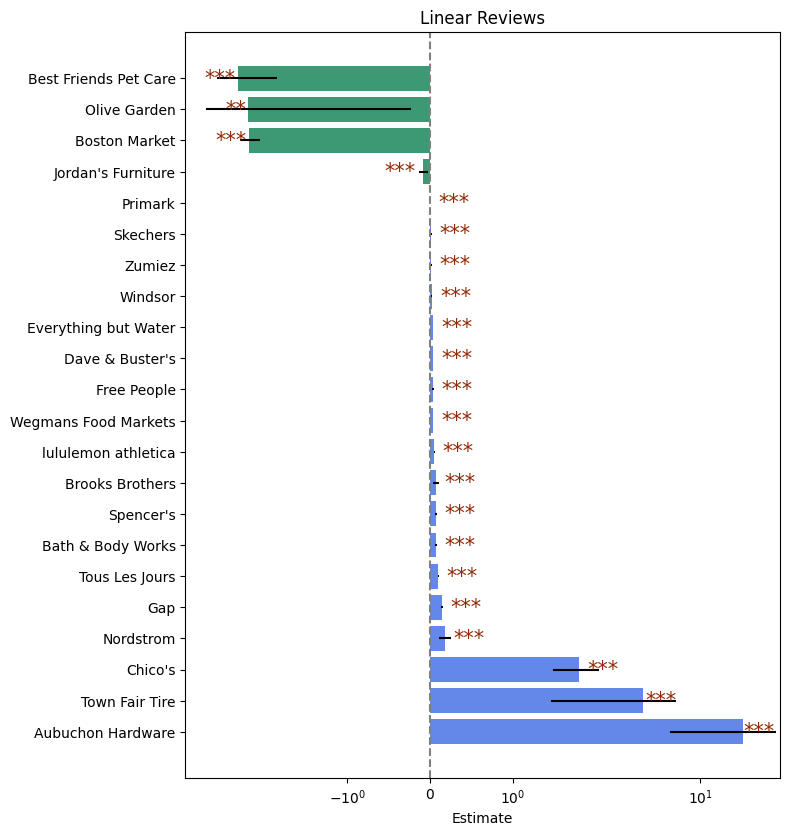

In [ ]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
lin_reviews['Lower Bound'] = lin_reviews['X_Estimate'] - 1.96 * lin_reviews['X_Std. Error']
lin_reviews['Upper Bound'] = lin_reviews['X_Estimate'] + 1.96 * lin_reviews['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in lin_reviews.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['X_pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Linear Reviews')
ax.set_xscale('symlog')

# Show the plot
plt.show()

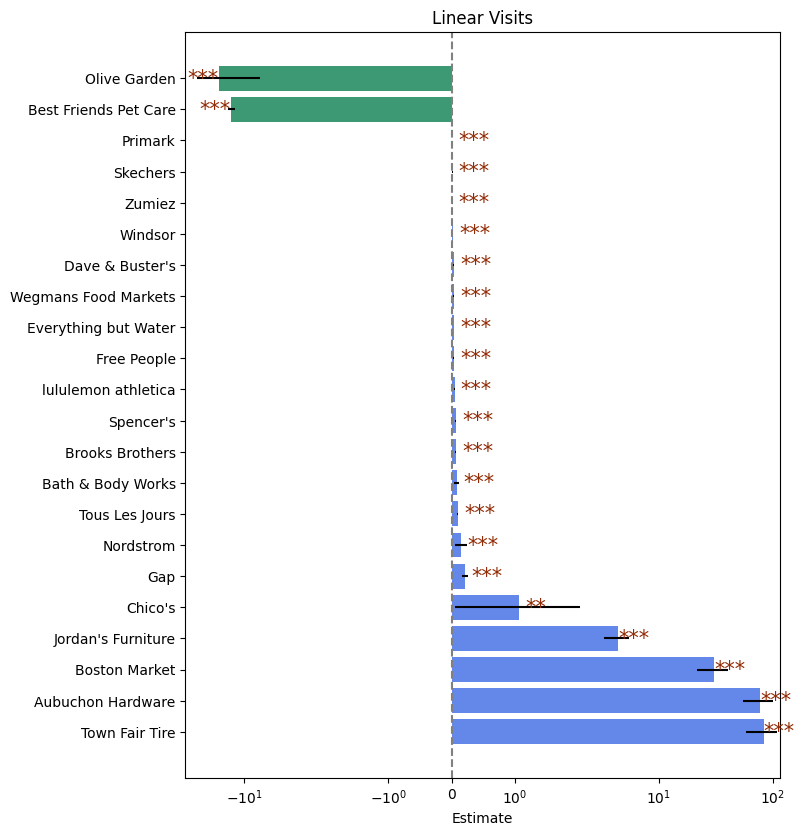

In [33]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
lin_visits['Lower Bound'] = lin_visits['X_Estimate'] - 1.96 * lin_visits['X_Std. Error']
lin_visits['Upper Bound'] = lin_visits['X_Estimate'] + 1.96 * lin_visits['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in lin_visits.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['X_pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Linear Visits')
ax.set_xscale('symlog')
ax.set_xlim()

# Show the plot
plt.show()

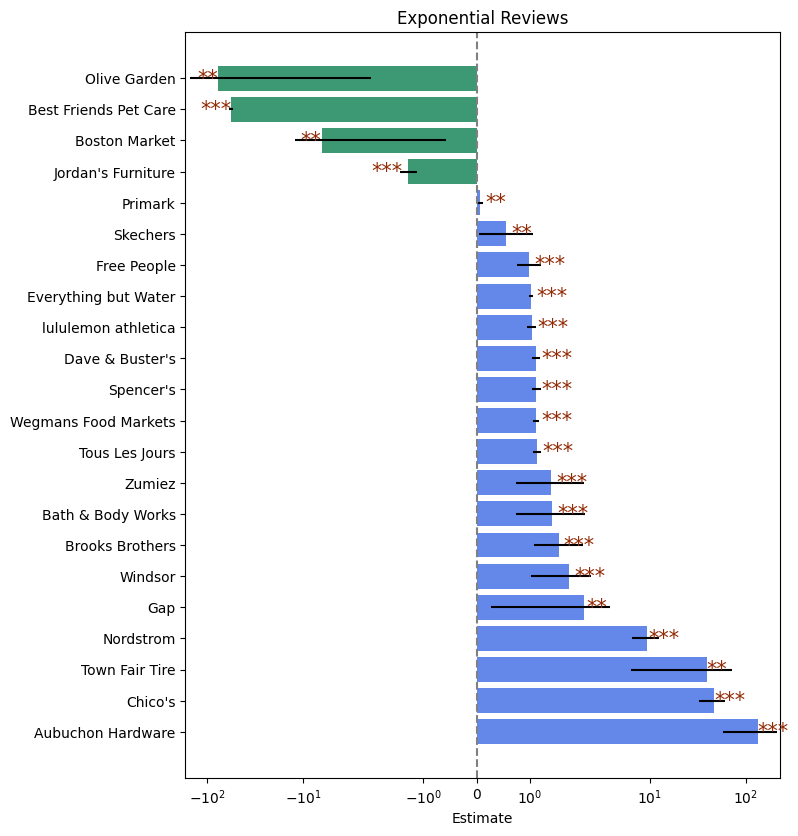

In [34]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
exp_reviews['Lower Bound'] = exp_reviews['X_Estimate'] - 1.96 * exp_reviews['X_Std. Error']
exp_reviews['Upper Bound'] = exp_reviews['X_Estimate'] + 1.96 * exp_reviews['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in exp_reviews.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['X_pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Exponential Reviews')
ax.set_xscale('symlog')

# Show the plot
plt.show()

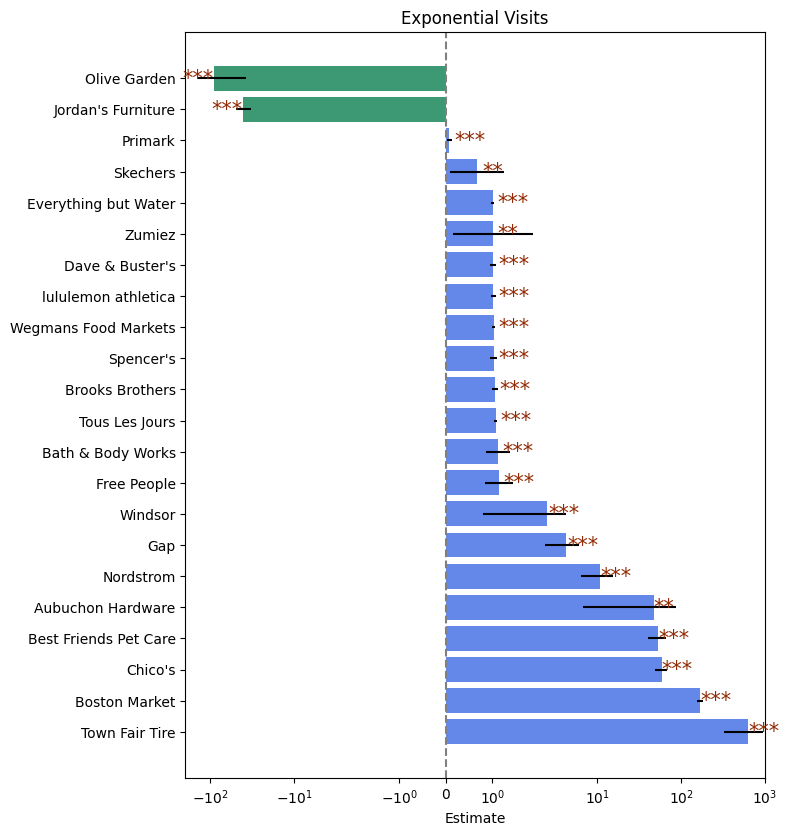

In [35]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
exp_visits['Lower Bound'] = exp_visits['X_Estimate'] - 1.96 * exp_visits['X_Std. Error']
exp_visits['Upper Bound'] = exp_visits['X_Estimate'] + 1.96 * exp_visits['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in exp_visits.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['X_pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Exponential Visits')
ax.set_xscale('symlog')

# Show the plot
plt.show()